# Calculate cumulative daily areas

In [1]:
import pandas as pd
import xarray as xr
from copy import deepcopy

tor_dset = xr.open_dataset('../data/tor_day_footprints_79-18_sid-212_grid.nc')
hail_dset = xr.open_dataset('../data/hail_day_footprints_79-18_sid-212_grid.nc')
wind_dset = xr.open_dataset('../data/wind_day_footprints_79-18_sid-212_grid.nc')

slgt_tor = deepcopy(tor_dset['pp_05'])
slgt_hail = deepcopy(hail_dset['pp_15'])
slgt_wind = deepcopy(wind_dset['pp_15'])

slight = 1*((slgt_tor + slgt_hail + slgt_wind)>0)

out_folder = '../figures/cumulative_area/'

# Calculate yearly areas

In [2]:
result_dict = {}

result_dict['Year'] = list(range(1979, 2019))

for dname, dset in zip(['5% Tornado', '15% Hail', '15% Wind', 'Combined'], 
                       [slgt_tor, slgt_hail, slgt_wind, slight]):

    result_dict[dname] = []
    
    if dname == '5% Tornado':
        
        res = slgt_tor.resample(time='AS').sum('time')
        result_dict[dname] = res.sum(('x', 'y')).values * 1600
        
    if dname == '15% Hail':
        
        res = slgt_hail.resample(time='AS').sum('time')
        result_dict[dname] = res.sum(('x', 'y')).values * 1600
        
    if dname == '15% Wind':
        
        res = slgt_wind.resample(time='AS').sum('time')
        result_dict[dname] = res.sum(('x', 'y')).values * 1600
        
    if dname == 'Combined':
        
        res = slight.resample(time='AS').sum('time')
        result_dict[dname] = res.sum(('x', 'y')).values * 1600
    
df = pd.DataFrame.from_dict(result_dict)
df = df.set_index('Year')

df.to_csv(out_folder + "yearly_cumulative_areas.csv")

print(df[(df.index < 1999)].sort_values(by='Combined', ascending=False))

print(df[(df.index < 1999)].mean())

      5% Tornado  15% Hail  15% Wind   Combined
Year                                           
1998    38435200  91912000  55718400  130963200
1996    32286400  79697600  45832000  112384000
1997    31436800  66859200  44142400  101827200
1995    31716800  65161600  18633600   88265600
1994    29926400  54556800  15904000   76836800
1992    34910400  50534400  14134400   75790400
1993    33212800  49902400  15600000   74683200
1991    32489600  42553600  11740800   64518400
1990    31606400  32201600  10801600   56955200
1989    25342400  32953600  12331200   54380800
1986    24456000  29668800   7169600   50336000
1985    21060800  31558400   6080000   47982400
1982    29808000  22196800   6542400   46388800
1983    27673600  21395200   7150400   44667200
1984    26838400  24446400   6625600   44107200
1980    26734400  18544000  10216000   42684800
1987    20699200  21251200   9425600   42187200
1988    20062400  21427200   7427200   40590400
1979    25993600  10446400   2633600   3

In [3]:
print(df[(df.index > 1998)].sort_values(by='Combined', ascending=False))

print(df[(df.index > 1998)].mean())

      5% Tornado   15% Hail   15% Wind   Combined
Year                                             
2008    40156800  132145600  120868800  194889600
2011    36820800   93280000  142238400  185592000
2006    27740800  114459200  106920000  174460800
2007    28873600  103979200  102198400  164368000
2005    30907200  104190400   93512000  162459200
2009    31820800  103779200   98216000  158296000
2004    41726400  100390400   88393600  157472000
2010    32488000   64795200  118022400  156443200
2003    32196800  103264000   93227200  155358400
2012    22520000   75446400  111544000  154779200
2016    26515200   62404800  111476800  150793600
2017    35552000   63238400  107476800  146092800
2015    30478400   59841600  104824000  143878400
2018    29243200   52806400  106894400  142214400
2001    31939200   96376000   65480000  137523200
2002    25235200   95388800   71798400  136387200
2013    23702400   62148800   98731200  134430400
2014    25352000   59123200   97448000  131529600


# Plot cumulative annual totals by day of year

# 5% tornado

1979 25.9936 sq km * 10^6
1980 26.7344 sq km * 10^6
1981 24.176 sq km * 10^6
1982 29.808 sq km * 10^6
1983 27.6736 sq km * 10^6
1984 26.8384 sq km * 10^6


C:\Users\ahaberlie1\AppData\Local\Continuum\anaconda3\envs\r37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


1985 21.0608 sq km * 10^6
1986 24.456 sq km * 10^6
1987 20.6992 sq km * 10^6
1988 20.0624 sq km * 10^6
1989 25.3424 sq km * 10^6
1990 31.6064 sq km * 10^6
1991 32.4896 sq km * 10^6
1992 34.9104 sq km * 10^6
1993 33.2128 sq km * 10^6
1994 29.9264 sq km * 10^6
1995 31.7168 sq km * 10^6
1996 32.2864 sq km * 10^6
1997 31.4368 sq km * 10^6
1998 38.4352 sq km * 10^6
1999 33.9856 sq km * 10^6
2000 31.32 sq km * 10^6
2001 31.9392 sq km * 10^6
2002 25.2352 sq km * 10^6
2003 32.1968 sq km * 10^6
2004 41.7264 sq km * 10^6
2005 30.9072 sq km * 10^6
2006 27.7408 sq km * 10^6
2007 28.8736 sq km * 10^6
2008 40.1568 sq km * 10^6
2009 31.8208 sq km * 10^6
2010 32.488 sq km * 10^6
2011 36.8208 sq km * 10^6
2012 22.52 sq km * 10^6
2013 23.7024 sq km * 10^6
2014 25.352 sq km * 10^6
2015 30.4784 sq km * 10^6
2016 26.5152 sq km * 10^6
2017 35.552 sq km * 10^6
2018 29.2432 sq km * 10^6


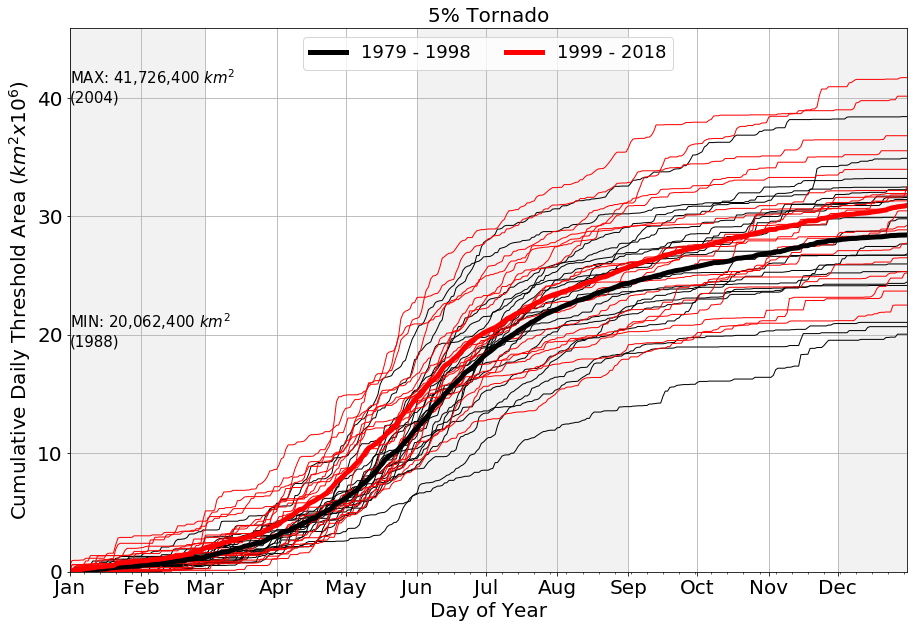

In [4]:
import matplotlib.pyplot as plt
import xarray as xr
import calendar
from datetime import date
import numpy as np
import matplotlib.dates as mdates

monthsFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
%matplotlib inline

plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(1, 1, 1)

res = np.zeros(shape=(40, 365), dtype=int)

for year in range(1979, 2019):

    dsub = slgt_tor.sel(time=slice(str(year) + '-01-01', str(year) + '-12-31'))

    vals = dsub.sum(('y', 'x'))
    
    vals = vals.groupby('time.dayofyear').sum()

    day_values = np.zeros(shape=(365), dtype=int)

    if calendar.isleap(year):

        values = vals.values
        
        #Add February 29th to February 28th
        #values[59] is actually the 60th index (60th day)
        values[58] += values[59]

        #Business as usual up until the 60 day (not inclusive)
        #Skip the 59th index (60th day)
        day_values[:59] = values[:59] 
        day_values[59:] = values[60:]

    else:

        day_values = vals.values

    res[year-1979,:] = 1600 * np.cumsum(day_values)
    
    print(year, res[year-1979,-1] / 10**6, "sq km * 10^6")
    
    if year < 1999:
    
        ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], res[year-1979,:] / 10**6, 'k-', lw=1)
        
    else:
        ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], res[year-1979,:] / 10**6, 'r-', lw=1)


ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], 
        np.mean(res[:20], axis=0) / 10**6, ls='-', color='k', lw=5, label='1979 - 1998')

ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], 
        np.mean(res[20:], axis=0) / 10**6, ls='-', color='r', lw=5, label='1999 - 2018')


year = np.argmax(np.max(res, axis=1))
ymax = np.max(res, axis=1)[year] / 10**6

plt.annotate("MAX: " + "{:,.0f}".format(ymax*10**6) + " $km^2$" + "\n({})".format(1979+year), 
             xy=('2017-01-01', ymax-(ymax*.05)), fontsize=15)

year = np.argmin(np.max(res, axis=1))
ymin = np.max(res, axis=1)[year] / 10**6

plt.annotate("MIN: " + "{:,.0f}".format(ymin*10**6) + " $km^2$" + "\n({})".format(1979+year), 
             xy=('2017-01-01', ymin-(ymin*.05)), fontsize=15)

ax.set_xlabel("Day of Year", fontsize=20)
ax.set_ylabel("Cumulative Daily Threshold Area ($km^2 x 10^6$)", fontsize=20)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.axvspan('2017-01-01', '2017-03-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-06-01', '2017-09-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-12-01', '2017-12-31', facecolor='0.5', alpha=0.1)

ax.set_xlim('2017-01-01', '2017-12-31')

plt.legend(prop={'size':18}, loc=9, ncol=2)

plt.grid()

ax.set_ylim(0, ymax + (ymax*.1))

#ax.annotate("b)", xy=('2017-01-05',9.1), fontsize=35, 
#      bbox=dict(facecolor='w', edgecolor='k', pad=6.0), zorder=15)

ax.set_title('5% Tornado', fontsize=20)

plt.savefig(out_folder + "5_p_tornado_area.png", bbox_inches='tight', dpi=300)

# 15% Hail

1979 10.4464 sq km * 10^6
1980 18.544 sq km * 10^6
1981 12.3808 sq km * 10^6
1982 22.1968 sq km * 10^6
1983 21.3952 sq km * 10^6
1984 24.4464 sq km * 10^6
1985 31.5584 sq km * 10^6
1986 29.6688 sq km * 10^6
1987 21.2512 sq km * 10^6
1988 21.4272 sq km * 10^6
1989 32.9536 sq km * 10^6
1990 32.2016 sq km * 10^6
1991 42.5536 sq km * 10^6
1992 50.5344 sq km * 10^6
1993 49.9024 sq km * 10^6
1994 54.5568 sq km * 10^6
1995 65.1616 sq km * 10^6
1996 79.6976 sq km * 10^6
1997 66.8592 sq km * 10^6
1998 91.912 sq km * 10^6
1999 84.8336 sq km * 10^6
2000 91.4048 sq km * 10^6
2001 96.376 sq km * 10^6
2002 95.3888 sq km * 10^6
2003 103.264 sq km * 10^6
2004 100.3904 sq km * 10^6
2005 104.1904 sq km * 10^6
2006 114.4592 sq km * 10^6
2007 103.9792 sq km * 10^6
2008 132.1456 sq km * 10^6
2009 103.7792 sq km * 10^6
2010 64.7952 sq km * 10^6
2011 93.28 sq km * 10^6
2012 75.4464 sq km * 10^6
2013 62.1488 sq km * 10^6
2014 59.1232 sq km * 10^6
2015 59.8416 sq km * 10^6
2016 62.4048 sq km * 10^6
2017 63.238

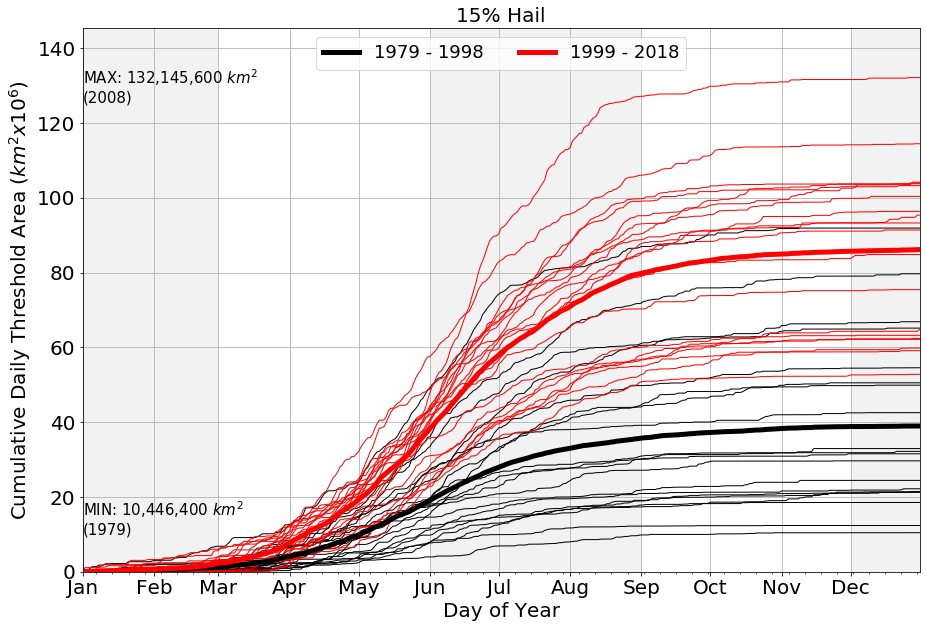

In [5]:
import matplotlib.pyplot as plt
import xarray as xr
import calendar
from datetime import date
import numpy as np
import matplotlib.dates as mdates

monthsFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
%matplotlib inline

plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(1, 1, 1)

res = np.zeros(shape=(40, 365), dtype=int)

for year in range(1979, 2019):

    dsub = slgt_hail.sel(time=slice(str(year) + '-01-01', str(year) + '-12-31'))

    vals = dsub.sum(('y', 'x'))

    day_values = np.zeros(shape=(365), dtype=int)

    if calendar.isleap(year):

        values = vals.values
        values[58] += values[59]

        day_values[:59] = values[:59] 
        day_values[59:] = values[60:]

    else:

        day_values = vals.values

    res[year-1979,:] = 1600 * np.cumsum(day_values)
    
    print(year, res[year-1979,-1] / 10**6, "sq km * 10^6")
    
    if year < 1999:
    
        ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], res[year-1979,:] / 10**6, 'k-', lw=1)
        
    else:
        ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], res[year-1979,:] / 10**6, 'r-', lw=1)


ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], 
        np.mean(res[:20], axis=0) / 10**6, ls='-', color='k', lw=5, label='1979 - 1998')

ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], 
        np.mean(res[20:], axis=0) / 10**6, ls='-', color='r', lw=5, label='1999 - 2018')


year = np.argmax(np.max(res, axis=1))
ymax = np.max(res, axis=1)[year] / 10**6

plt.annotate("MAX: " + "{:,.0f}".format(ymax*10**6) + " $km^2$" + "\n({})".format(1979+year), 
             xy=('2017-01-01', ymax-(ymax*.05)), fontsize=15)

year = np.argmin(np.max(res, axis=1))
ymin = np.max(res, axis=1)[year] / 10**6

plt.annotate("MIN: " + "{:,.0f}".format(ymin*10**6) + " $km^2$" + "\n({})".format(1979+year), 
             xy=('2017-01-01', ymin-(ymin*.05)), fontsize=15)

ax.set_xlabel("Day of Year", fontsize=20)
ax.set_ylabel("Cumulative Daily Threshold Area ($km^2 x 10^6$)", fontsize=20)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.axvspan('2017-01-01', '2017-03-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-06-01', '2017-09-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-12-01', '2017-12-31', facecolor='0.5', alpha=0.1)

ax.set_xlim('2017-01-01', '2017-12-31')

plt.legend(prop={'size':18}, loc=9, ncol=2)

plt.grid()

ax.set_ylim(0, ymax + (ymax*.1))

#ax.annotate("b)", xy=('2017-01-05',9.1), fontsize=35, 
#      bbox=dict(facecolor='w', edgecolor='k', pad=6.0), zorder=15)

ax.set_title('15% Hail', fontsize=20)

plt.savefig(out_folder + "15_p_hail_area.png", bbox_inches='tight', dpi=300)

# 15% Wind

1979 2.6336 sq km * 10^6
1980 10.216 sq km * 10^6
1981 4.3104 sq km * 10^6
1982 6.5424 sq km * 10^6
1983 7.1504 sq km * 10^6
1984 6.6256 sq km * 10^6
1985 6.08 sq km * 10^6
1986 7.1696 sq km * 10^6
1987 9.4256 sq km * 10^6
1988 7.4272 sq km * 10^6
1989 12.3312 sq km * 10^6
1990 10.8016 sq km * 10^6
1991 11.7408 sq km * 10^6
1992 14.1344 sq km * 10^6
1993 15.6 sq km * 10^6
1994 15.904 sq km * 10^6
1995 18.6336 sq km * 10^6
1996 45.832 sq km * 10^6
1997 44.1424 sq km * 10^6
1998 55.7184 sq km * 10^6
1999 50.0896 sq km * 10^6
2000 58.6624 sq km * 10^6
2001 65.48 sq km * 10^6
2002 71.7984 sq km * 10^6
2003 93.2272 sq km * 10^6
2004 88.3936 sq km * 10^6
2005 93.512 sq km * 10^6
2006 106.92 sq km * 10^6
2007 102.1984 sq km * 10^6
2008 120.8688 sq km * 10^6
2009 98.216 sq km * 10^6
2010 118.0224 sq km * 10^6
2011 142.2384 sq km * 10^6
2012 111.544 sq km * 10^6
2013 98.7312 sq km * 10^6
2014 97.448 sq km * 10^6
2015 104.824 sq km * 10^6
2016 111.4768 sq km * 10^6
2017 107.4768 sq km * 10^6
201

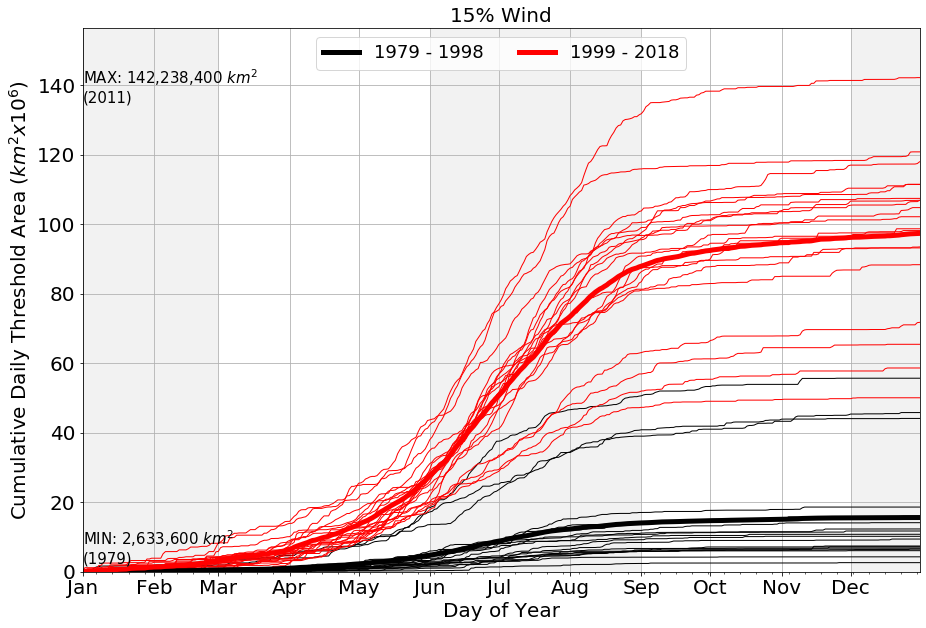

In [6]:
import matplotlib.pyplot as plt
import xarray as xr
import calendar
from datetime import date
import numpy as np
import matplotlib.dates as mdates

monthsFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
%matplotlib inline

plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(1, 1, 1)

res = np.zeros(shape=(40, 365), dtype=int)

for year in range(1979, 2019):

    dsub = slgt_wind.sel(time=slice(str(year) + '-01-01', str(year) + '-12-31'))

    vals = dsub.sum(('y', 'x'))

    day_values = np.zeros(shape=(365), dtype=int)

    if calendar.isleap(year):

        values = vals.values
        values[58] += values[59]

        day_values[:59] = values[:59] 
        day_values[59:] = values[60:]

    else:

        day_values = vals.values

    res[year-1979,:] = 1600 * np.cumsum(day_values)
    
    print(year, res[year-1979,-1] / 10**6, "sq km * 10^6")
    
    if year < 1999:
    
        ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], res[year-1979,:] / 10**6, 'k-', lw=1)
        
    else:
        ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], res[year-1979,:] / 10**6, 'r-', lw=1)


ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], 
        np.mean(res[:20], axis=0) / 10**6, ls='-', color='k', lw=5, label='1979 - 1998')

ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], 
        np.mean(res[20:], axis=0) / 10**6, ls='-', color='r', lw=5, label='1999 - 2018')


year = np.argmax(np.max(res, axis=1))
ymax = np.max(res, axis=1)[year] / 10**6

plt.annotate("MAX: " + "{:,.0f}".format(ymax*10**6) + " $km^2$" + "\n({})".format(1979+year), 
             xy=('2017-01-01', ymax-(ymax*.05)), fontsize=15)

year = np.argmin(np.max(res, axis=1))
ymin = np.max(res, axis=1)[year] / 10**6

plt.annotate("MIN: " + "{:,.0f}".format(ymin*10**6) + " $km^2$" + "\n({})".format(1979+year), 
             xy=('2017-01-01', ymin-(ymin*.05)), fontsize=15)

ax.set_xlabel("Day of Year", fontsize=20)
ax.set_ylabel("Cumulative Daily Threshold Area ($km^2 x 10^6$)", fontsize=20)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.axvspan('2017-01-01', '2017-03-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-06-01', '2017-09-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-12-01', '2017-12-31', facecolor='0.5', alpha=0.1)

ax.set_xlim('2017-01-01', '2017-12-31')

plt.legend(prop={'size':18}, loc=9, ncol=2)

plt.grid()

ax.set_ylim(0, ymax + (ymax*.1))

#ax.annotate("b)", xy=('2017-01-05',9.1), fontsize=35, 
#      bbox=dict(facecolor='w', edgecolor='k', pad=6.0), zorder=15)

ax.set_title('15% Wind', fontsize=20)

plt.savefig(out_folder + "15_p_wind_area.png", bbox_inches='tight', dpi=300)

# 5% tornado, 15% hail, or 15% wind

1979 33.7504 sq km * 10^6
1980 42.6848 sq km * 10^6
1981 33.0768 sq km * 10^6
1982 46.3888 sq km * 10^6
1983 44.6672 sq km * 10^6
1984 44.1072 sq km * 10^6
1985 47.9824 sq km * 10^6
1986 50.336 sq km * 10^6
1987 42.1872 sq km * 10^6
1988 40.5904 sq km * 10^6
1989 54.3808 sq km * 10^6
1990 56.9552 sq km * 10^6
1991 64.5184 sq km * 10^6
1992 75.7904 sq km * 10^6
1993 74.6832 sq km * 10^6
1994 76.8368 sq km * 10^6
1995 88.2656 sq km * 10^6
1996 112.384 sq km * 10^6
1997 101.8272 sq km * 10^6
1998 130.9632 sq km * 10^6
1999 116.888 sq km * 10^6
2000 127.4352 sq km * 10^6
2001 137.5232 sq km * 10^6
2002 136.3872 sq km * 10^6
2003 155.3584 sq km * 10^6
2004 157.472 sq km * 10^6
2005 162.4592 sq km * 10^6
2006 174.4608 sq km * 10^6
2007 164.368 sq km * 10^6
2008 194.8896 sq km * 10^6
2009 158.296 sq km * 10^6
2010 156.4432 sq km * 10^6
2011 185.592 sq km * 10^6
2012 154.7792 sq km * 10^6
2013 134.4304 sq km * 10^6
2014 131.5296 sq km * 10^6
2015 143.8784 sq km * 10^6
2016 150.7936 sq km * 10^

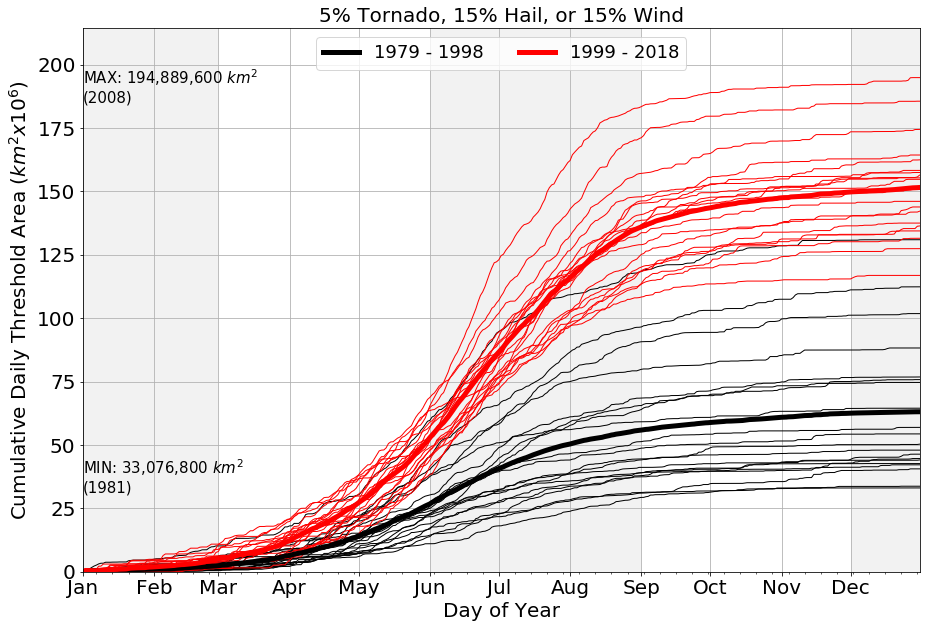

In [7]:
import matplotlib.pyplot as plt
import xarray as xr
import calendar
from datetime import date
import numpy as np
import matplotlib.dates as mdates

monthsFmt = mdates.DateFormatter('%b')
months = mdates.MonthLocator()
%matplotlib inline

plt.rcParams['figure.figsize'] = 15, 10
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

ax = plt.subplot(1, 1, 1)

res = np.zeros(shape=(40, 365), dtype=int)

for year in range(1979, 2019):

    dsub = slight.sel(time=slice(str(year) + '-01-01', str(year) + '-12-31'))

    vals = dsub.sum(('y', 'x'))

    day_values = np.zeros(shape=(365), dtype=int)

    if calendar.isleap(year):

        values = vals.values
        values[58] += values[59]

        day_values[:59] = values[:59] 
        day_values[59:] = values[60:]

    else:

        day_values = vals.values

    res[year-1979,:] = 1600 * np.cumsum(day_values)
    
    print(year, res[year-1979,-1] / 10**6, "sq km * 10^6")
    
    if year < 1999:
    
        ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], res[year-1979,:] / 10**6, 'k-', lw=1)
        
    else:
        ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], res[year-1979,:] / 10**6, 'r-', lw=1)


ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], 
        np.mean(res[:20], axis=0) / 10**6, ls='-', color='k', lw=5, label='1979 - 1998')

ax.plot([date.fromordinal(x) for x in list(range(736330, 736695))], 
        np.mean(res[20:], axis=0) / 10**6, ls='-', color='r', lw=5, label='1999 - 2018')


year = np.argmax(np.max(res, axis=1))
ymax = np.max(res, axis=1)[year] / 10**6

plt.annotate("MAX: " + "{:,.0f}".format(ymax*10**6) + " $km^2$" + "\n({})".format(1979+year), 
             xy=('2017-01-01', ymax-(ymax*.05)), fontsize=15)

year = np.argmin(np.max(res, axis=1))
ymin = np.max(res, axis=1)[year] / 10**6

plt.annotate("MIN: " + "{:,.0f}".format(ymin*10**6) + " $km^2$" + "\n({})".format(1979+year), 
             xy=('2017-01-01', ymin-(ymin*.05)), fontsize=15)

ax.set_xlabel("Day of Year", fontsize=20)
ax.set_ylabel("Cumulative Daily Threshold Area ($km^2 x 10^6$)", fontsize=20)

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.axvspan('2017-01-01', '2017-03-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-06-01', '2017-09-01', facecolor='0.5', alpha=0.1)
ax.axvspan('2017-12-01', '2017-12-31', facecolor='0.5', alpha=0.1)

ax.set_xlim('2017-01-01', '2017-12-31')

plt.legend(prop={'size':18}, loc=9, ncol=2)

plt.grid()

ax.set_ylim(0, ymax + (ymax*.1))

#ax.annotate("b)", xy=('2017-01-05',9.1), fontsize=35, 
#      bbox=dict(facecolor='w', edgecolor='k', pad=6.0), zorder=15)

ax.set_title('5% Tornado, 15% Hail, or 15% Wind', fontsize=20)

plt.savefig(out_folder + "15_p_slight_area.png", bbox_inches='tight', dpi=300)